# minuteIntensitiesWide_merged Dataset

Exploring 

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path_wide = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteIntensitiesWide_merged.csv'
df_minute_intensities_wide = pd.read_csv(file_path_wide)

# Display the first few rows
print(df_minute_intensities_wide.head())

           Id           ActivityHour  Intensity00  Intensity01  Intensity02  \
0  1503960366  4/13/2016 12:00:00 AM            1            1            0   
1  1503960366   4/13/2016 1:00:00 AM            0            0            0   
2  1503960366   4/13/2016 2:00:00 AM            0            0            0   
3  1503960366   4/13/2016 3:00:00 AM            0            0            0   
4  1503960366   4/13/2016 4:00:00 AM            0            0            0   

   Intensity03  Intensity04  Intensity05  Intensity06  Intensity07  ...  \
0            0            0            1            0            1  ...   
1            0            0            0            0            0  ...   
2            0            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   Intensity50  Intensity51  Intensity52  Intensity53  Intensity54  \
0   

In [2]:
# Display basic information about the dataset
print(df_minute_intensities_wide.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Intensity00   21645 non-null  int64 
 3   Intensity01   21645 non-null  int64 
 4   Intensity02   21645 non-null  int64 
 5   Intensity03   21645 non-null  int64 
 6   Intensity04   21645 non-null  int64 
 7   Intensity05   21645 non-null  int64 
 8   Intensity06   21645 non-null  int64 
 9   Intensity07   21645 non-null  int64 
 10  Intensity08   21645 non-null  int64 
 11  Intensity09   21645 non-null  int64 
 12  Intensity10   21645 non-null  int64 
 13  Intensity11   21645 non-null  int64 
 14  Intensity12   21645 non-null  int64 
 15  Intensity13   21645 non-null  int64 
 16  Intensity14   21645 non-null  int64 
 17  Intensity15   21645 non-null  int64 
 18  Intensity16   21645 non-null  int64 
 19  Inte

In [3]:
# Checking for missing values in each column
print(df_minute_intensities_wide.isnull().sum())

Id              0
ActivityHour    0
Intensity00     0
Intensity01     0
Intensity02     0
               ..
Intensity55     0
Intensity56     0
Intensity57     0
Intensity58     0
Intensity59     0
Length: 62, dtype: int64


In [3]:
# Checking for missing values in each column
print(df_minute_intensities_wide.isnull().sum())

Id              0
ActivityHour    0
Intensity00     0
Intensity01     0
Intensity02     0
               ..
Intensity55     0
Intensity56     0
Intensity57     0
Intensity58     0
Intensity59     0
Length: 62, dtype: int64


Data Preprocessing:

In [4]:
# Handling missing values

# Checking for duplicate rows
duplicates_wide = df_minute_intensities_wide.duplicated()
print("Number of Duplicate Rows:", duplicates_wide.sum())


Number of Duplicate Rows: 0


In [5]:
duplicate_rows_wide = df_minute_intensities_wide[duplicates_wide]
print("\nAs No Duplicate Rows:")
print(duplicate_rows_wide)


As No Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityHour, Intensity00, Intensity01, Intensity02, Intensity03, Intensity04, Intensity05, Intensity06, Intensity07, Intensity08, Intensity09, Intensity10, Intensity11, Intensity12, Intensity13, Intensity14, Intensity15, Intensity16, Intensity17, Intensity18, Intensity19, Intensity20, Intensity21, Intensity22, Intensity23, Intensity24, Intensity25, Intensity26, Intensity27, Intensity28, Intensity29, Intensity30, Intensity31, Intensity32, Intensity33, Intensity34, Intensity35, Intensity36, Intensity37, Intensity38, Intensity39, Intensity40, Intensity41, Intensity42, Intensity43, Intensity44, Intensity45, Intensity46, Intensity47, Intensity48, Intensity49, Intensity50, Intensity51, Intensity52, Intensity53, Intensity54, Intensity55, Intensity56, Intensity57, Intensity58, Intensity59]
Index: []

[0 rows x 62 columns]


In [6]:
# Removing the Duplicate Rows
df_minute_intensities_wide = df_minute_intensities_wide.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(df_minute_intensities_wide))



No Existing Duplicates:
Total Number of Rows: 21645


Visualization:

C:\Users\intag\AppData\Local\Temp\ipykernel_10696\57769811.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_minute_intensities_wide['ActivityHour'] = pd.to_datetime(df_minute_intensities_wide['ActivityHour'])


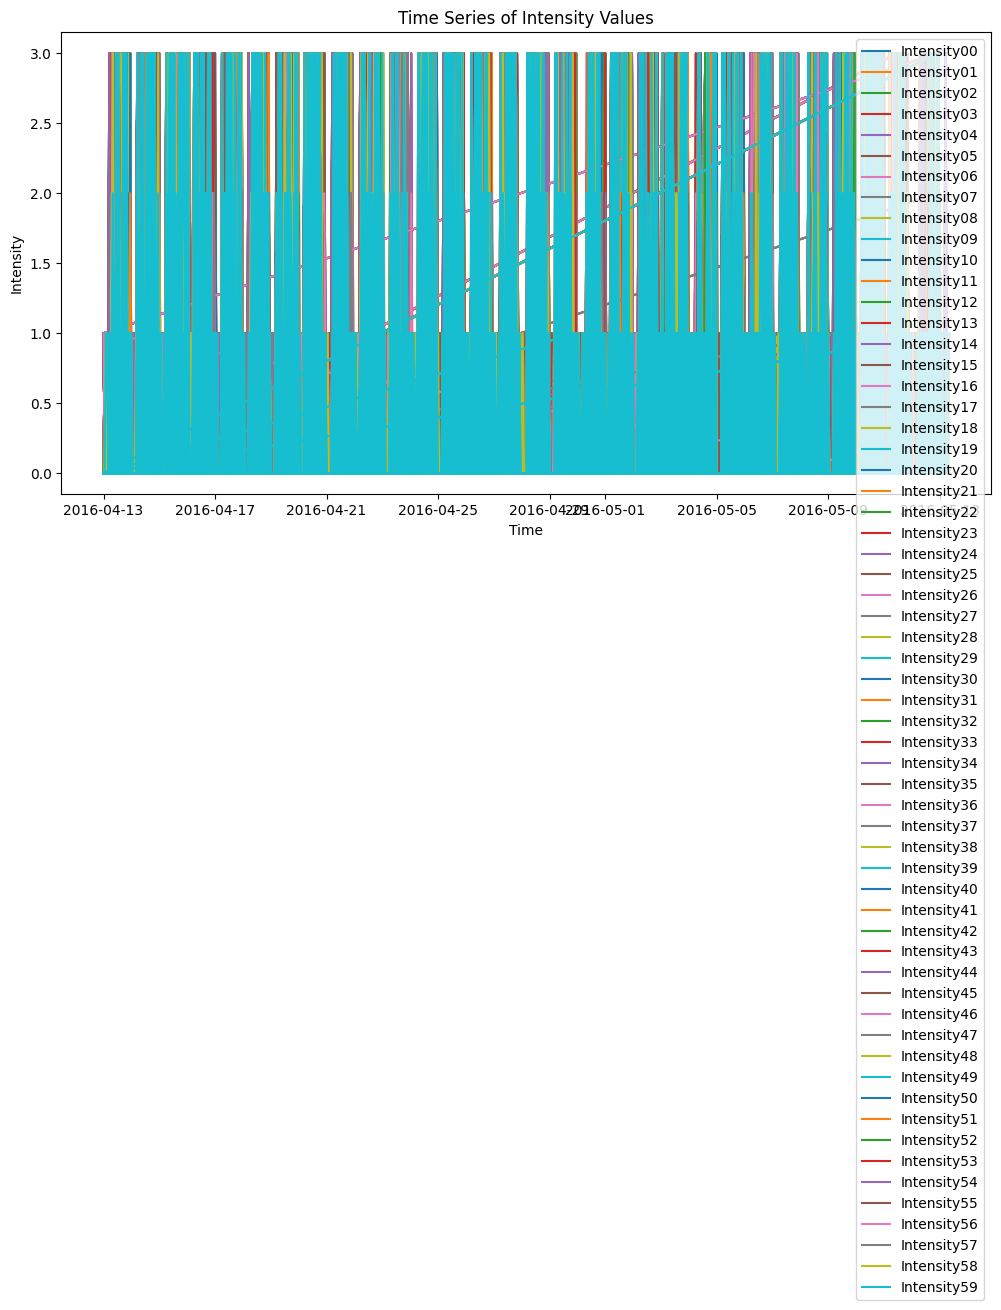

In [7]:
# Convert 'ActivityHour' to datetime format
df_minute_intensities_wide['ActivityHour'] = pd.to_datetime(df_minute_intensities_wide['ActivityHour'])

# Visualization: Time series plot for 'Intensity' values
plt.figure(figsize=(12, 6))
for i in range(2, len(df_minute_intensities_wide.columns)):
    plt.plot(df_minute_intensities_wide['ActivityHour'], df_minute_intensities_wide.iloc[:, i], label=df_minute_intensities_wide.columns[i])

plt.title('Time Series of Intensity Values')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend(loc='upper right')
plt.show()


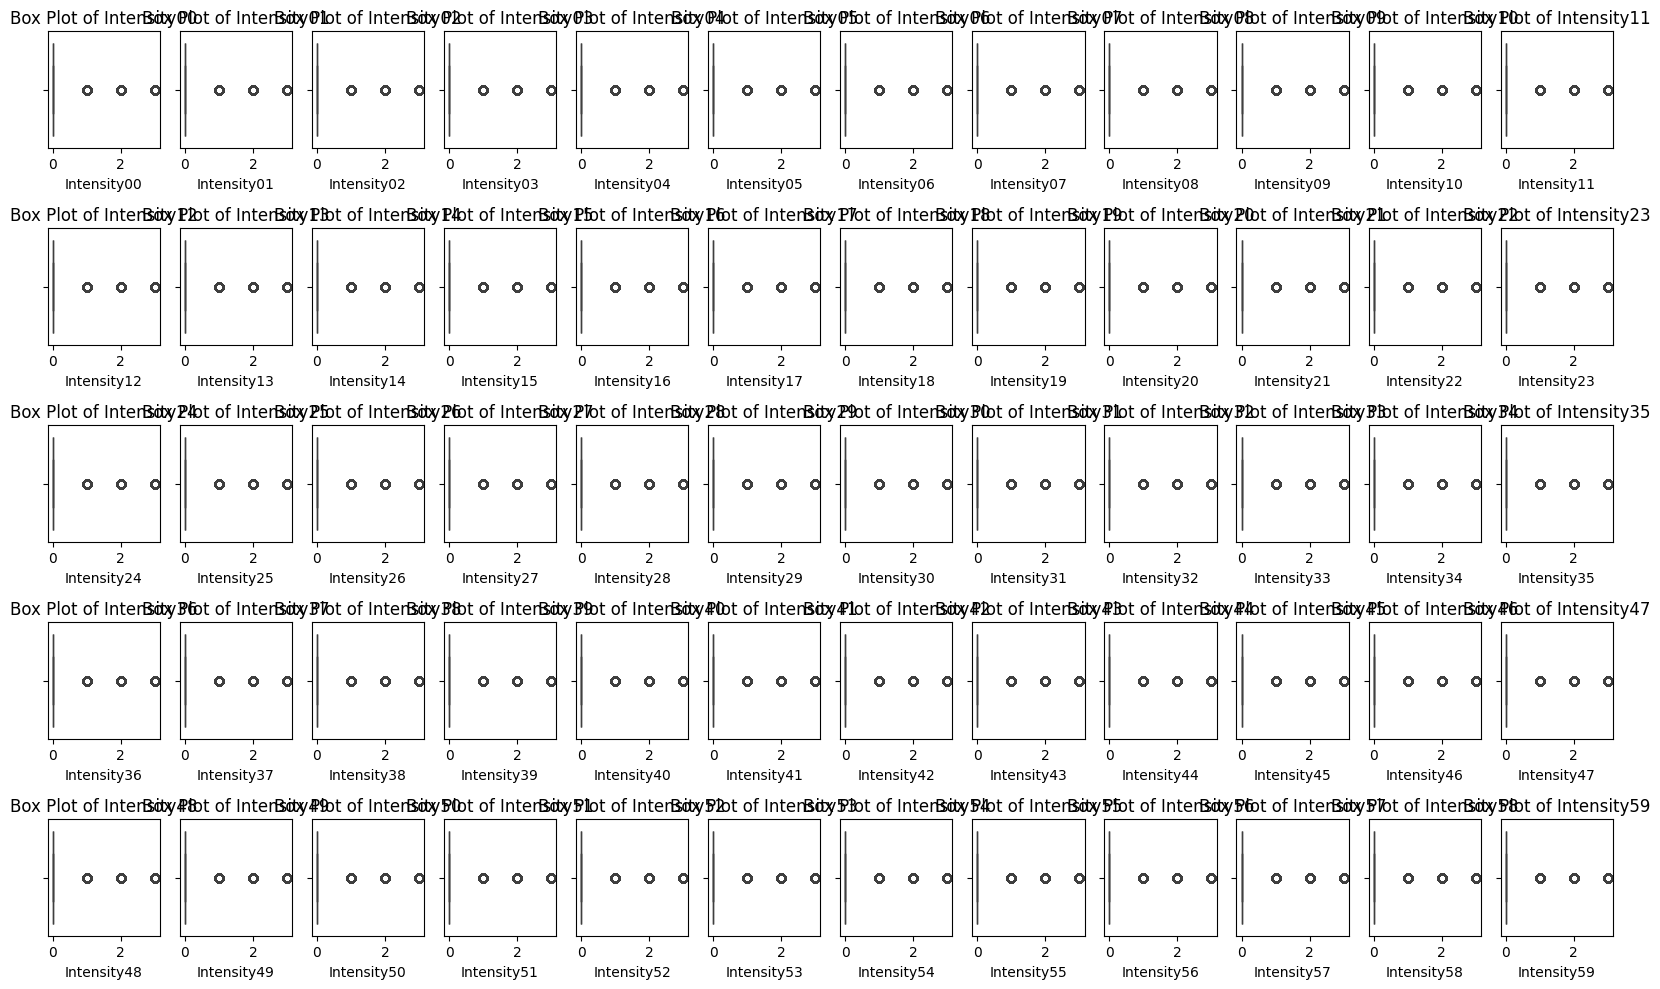

In [9]:
# Box plot for 'Intensity' values
plt.figure(figsize=(16, 10))
for i, column in enumerate(df_minute_intensities_wide.columns[2:]):
    plt.subplot(5, 12, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=df_minute_intensities_wide[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Removing Outliers

In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers in each column of df_minute_intensities_wide
for column in df_minute_intensities_wide.columns[2:]:
    df_minute_intensities_wide = remove_outliers_iqr(df_minute_intensities_wide, column)


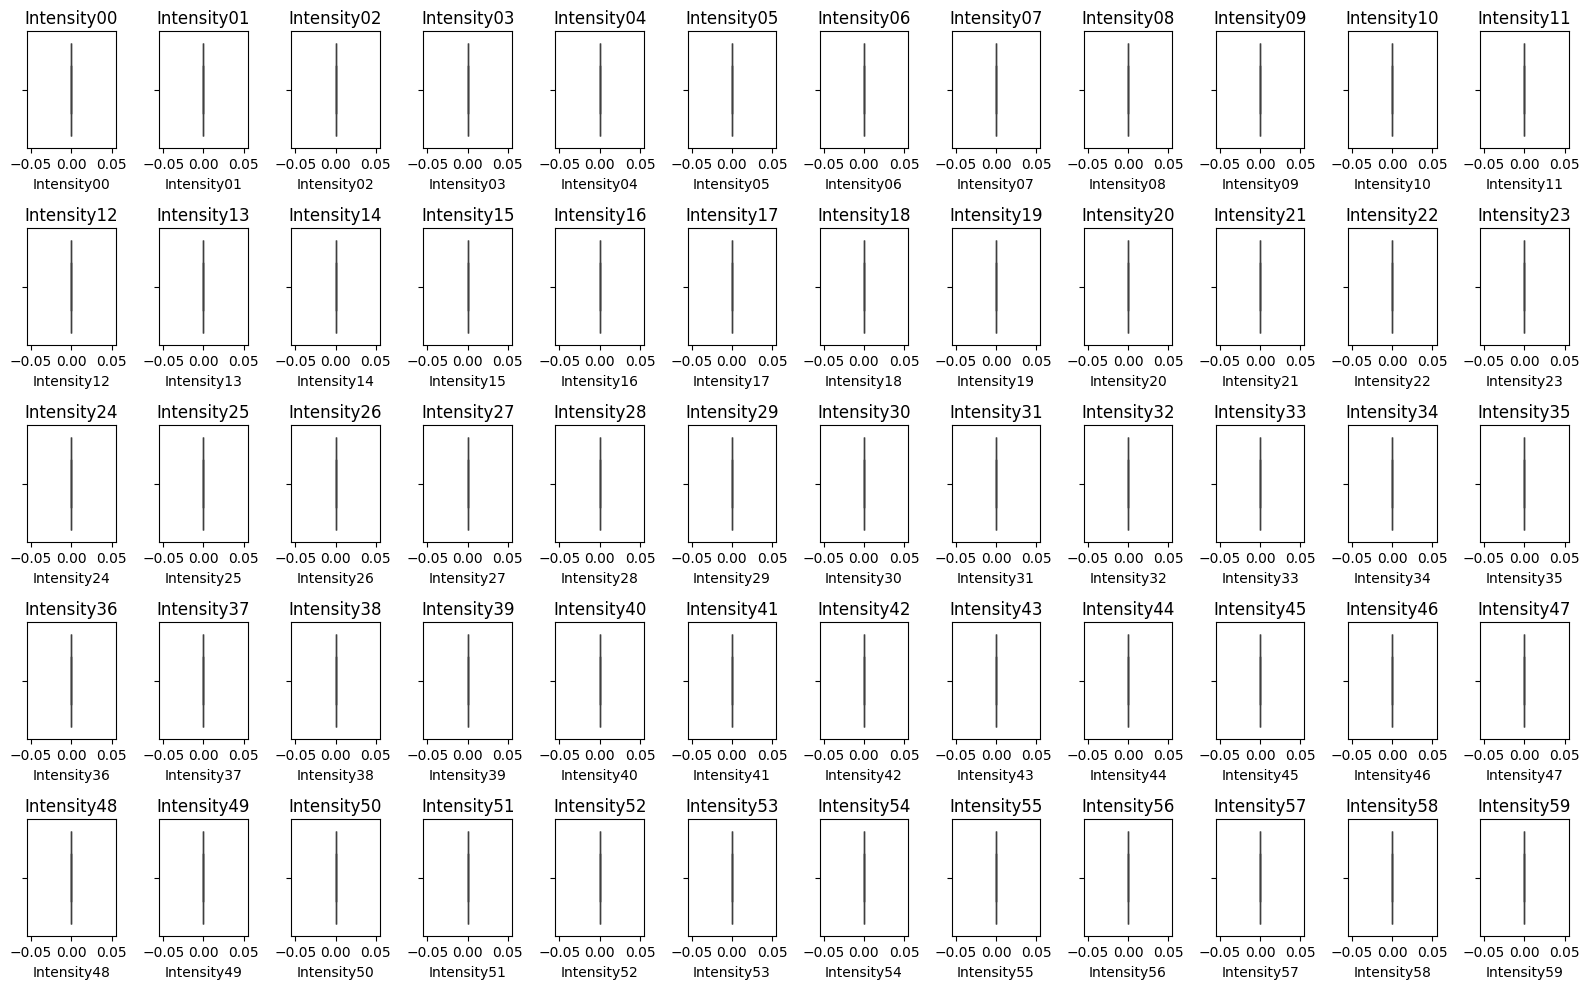

In [9]:
# Box plot without outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(df_minute_intensities_wide.columns[2:]):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(x=df_minute_intensities_wide[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [11]:
# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteIntensitiesWide_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_minute_intensities_wide.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteIntensitiesWide_merged_Filtered.csv
